<a href="https://colab.research.google.com/github/rraulison/b3/blob/main/raspagem_bovespa_indices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Script para raspagem do site da b3 obtendo o retorno dos índices (IBRX, IBRA, SMALL, etc)

In [ ]:
!pip install -q selenium
!apt-get -qq update
!apt install -qq chromium-chromedriver

In [2]:
import pandas as pd
from time import sleep
from selenium import webdriver
from selenium.webdriver.common.by import By
import os
import calendar
import time

In [3]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd_chrome = webdriver.Chrome(options=chrome_options)

In [4]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC

IBOV (1998~) = https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/indice-ibovespa-ibovespa-estatisticas-historicas.htm

IBRX 100 (1998~) = https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/indice-brasil-100-ibrx-100-estatisticas-historicas.htm

IBRX 50 (1998~)= https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/indice-brasil-50-ibrx-50-estatisticas-historicas.htm

IBRA (2006~)= https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/indice-brasil-amplo-ibra-estatisticas-historicas.htm

SMLL (2006~) = https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-de-segmentos-e-setoriais/indice-small-cap-smll-estatisticas-historicas.htm

IFIX (2011~)= https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-de-segmentos-e-setoriais/indice-fundos-de-investimentos-imobiliarios-ifix-estatisticas-historicas.htm

IEEX (1998~) = https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-de-segmentos-e-setoriais/indice-energia-eletrica-iee-estatisticas-historicas.htm

IDIV (2006~) = https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-de-segmentos-e-setoriais/indice-dividendos-idiv-estatisticas-historicas.htm

IVBX2 (2000~) = https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-de-segmentos-e-setoriais/indice-valor-2-linha-ivbx-2-estatisticas-historicas.htm

In [5]:
#Baixa todos os arquivos a partir de 1998 a 2022 e renomeia para '1998.csv'
url = 'https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/indice-ibovespa-ibovespa-estatisticas-historicas.htm'
wd_chrome.get(url)
iframe = wd_chrome.find_element(By.ID, value= "bvmf_iframe")    
wd_chrome.switch_to.frame(iframe)

for i in range(1998,2023): 

  WebDriverWait(wd_chrome, 5).until(EC.element_to_be_clickable((By.XPATH, '//*[@id="selectYear"]'))).send_keys(f'{i}')
  wd_chrome.switch_to.active_element
  WebDriverWait(wd_chrome, 5).until(EC.element_to_be_clickable((By.LINK_TEXT, 'Download (ano selecionado)')))
  down = wd_chrome.find_element(By.LINK_TEXT, value='Download (ano selecionado)')
  
  wd_chrome.execute_script("arguments[0].click();", down)
  time.sleep(2)
  while not os.path.isfile('/content/Evolucao_Diaria.csv'):
    time.sleep(0.2)
  os.rename('Evolucao_Diaria.csv', f'{i}.csv')

In [6]:
#cria uma lista com os nomes dos arquivos para iterar
arquivo = !ls -1t *.csv
arquivo = arquivo.sort()

In [14]:
lista = []

In [15]:
#itera em cada arquivo csv transformando a data para o formato datetime pandas
for i in arquivo:
  df = pd.read_csv(i, sep=';', encoding='ISO-8859-1', skipfooter=2, engine='python', thousands='.', decimal=',', header=1, index_col=False)
  df.columns = calendar.month_name[0:13]
  df1 = df.melt('', var_name='Date', value_name='ibov')
  df1 = df1.dropna()
  df1.index = pd.to_datetime(i.rstrip('.csv') + df1.Date + df1.pop('').astype(str), format='%Y%B%d', errors='coerce')
  df1 = df1.drop(columns=['Date'])
  lista.append(df1)

In [16]:
ibov = pd.concat(lista)

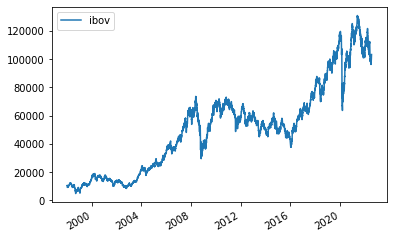

In [17]:
ibov.plot()